# Useful image processing libraries in Python 

In [1]:
import numpy as np
from scipy import misc
from scipy.ndimage import affine_transform, zoom

In [2]:
from skimage import io, img_as_ubyte, img_as_float
from skimage.transform import rescale
from skimage.color import rgb2lab, lab2rgb, rgba2rgb
from skimage.io import imread, imsave, imshow, show, imshow_collection, imread_collection
from skimage import color, exposure, viewer, data
from skimage.util import invert, random_noise, montage
from skimage.transform import SimilarityTransform, warp, swirl

/usr/lib/python3.10/importlib/__init__.py:126: UserWarning: viewer requires Qt
  return _bootstrap._gcd_import(name[level:], package, level)


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat

In [5]:
import imageio

The following code snippets give examples on reading images and perform simple manipulations on images including displaying and saving images, conversions from color to grayscale, conversions from one color space to another, and basic affine transformations.

## Many libraries including Scikit-image, Matplotlib, Pil, and Misc provide functions for reading, saving and displaying images

### Reading, displaying, and saving an image using scikit-image¶

In [7]:
img1 = io.imread("lab1_imgs/girl.tif") #provide the correct path to the input image
img2 = io.imread("lab1_imgs/boy.tif")
img3 = io.imread('lab1_imgs/chronometer.tif')
lena_rgb = io.imread("lab1_imgs/lena_RGB.tif")
lena_gray = io.imread("lab1_imgs/lena_RGB.tif", as_gray=True) #read as gray scale image

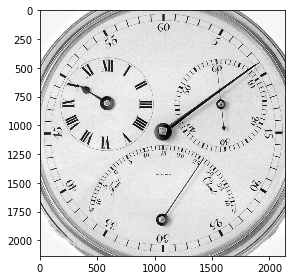

In [8]:
io.imshow(img3, cmap=plt.cm.gray)
plt.show()

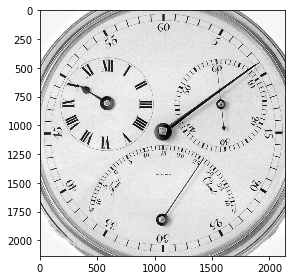

In [9]:
imshow(img3)

### Rescale an image

/tmp/ipykernel_5686/839110356.py:1: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  img3_rescaled = rescale(img3, 0.25, multichannel=False)


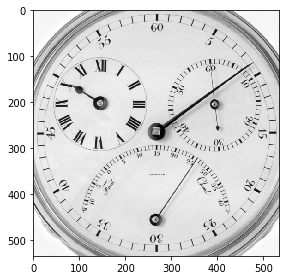

In [10]:
img3_rescaled = rescale(img3, 0.25, multichannel=False)
io.imshow(img3_rescaled, cmap='gray')
plt.show()

Check the sizes of the original and rescaled images

In [11]:
img3.shape

(2136, 2140)

In [12]:
img3_rescaled.shape

(534, 535)

In [13]:
img3.dtype

dtype('uint8')

In [14]:
img3_rescaled.dtype

dtype('float64')

Save an image

In [15]:
img3_rescaled = img_as_ubyte(img3_rescaled)
io.imsave('lab1_imgs/chronometer_rescaled.png', img3_rescaled)
img3_rescaled.dtype

dtype('uint8')

# Display images side-by-side in rows and columns

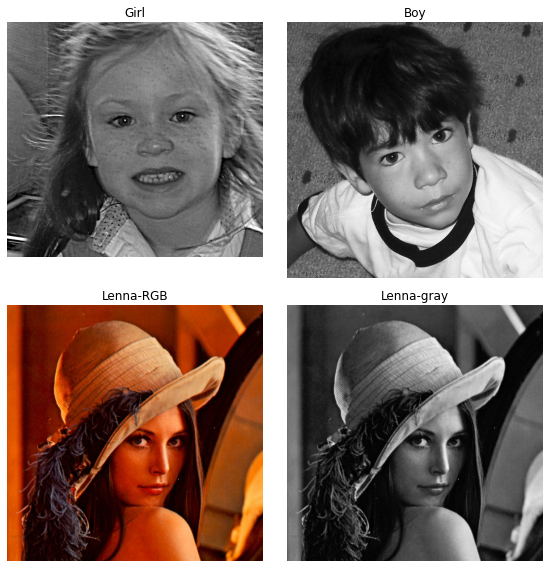

In [16]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8), sharex=True, sharey=True)
ax=axes.ravel()
ax[0].imshow(img1, cmap=plt.cm.gray)
ax[0].set_title('Girl')

ax[1].imshow(img2, cmap='gray')
ax[1].set_title('Boy')

ax[2].imshow(lena_rgb)
ax[2].set_title('Lenna-RGB')

ax[3].imshow(lena_gray, cmap=plt.cm.gray)
ax[3].set_title('Lenna-gray')

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

In [17]:
print(lena_rgb.shape, lena_rgb.dtype, type(lena_rgb))

(512, 512, 3) uint8 <class 'numpy.ndarray'>


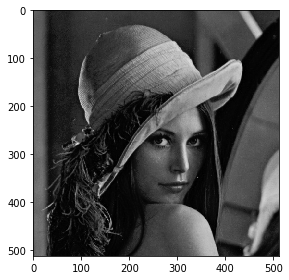

In [18]:
io.imshow(lena_gray,cmap='gray')

### Read and Display an image using Matplotlib

In [20]:
parrot=mpimg.imread("lab1_imgs/parrot.jpg") #read the image as a numpy ndarray
print(parrot.shape, parrot.dtype, type(parrot))

(340, 453, 3) uint8 <class 'numpy.ndarray'>


<function matplotlib.pyplot.show(close=None, block=None)>

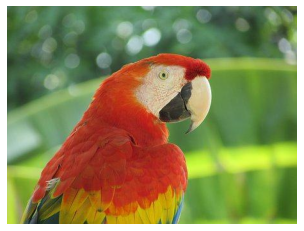

In [21]:
plt.figure
plt.imshow(parrot)
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

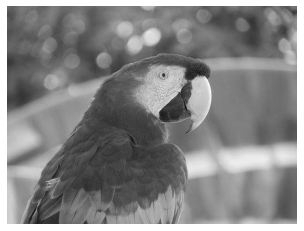

In [22]:
parrot_gray = color.rgb2gray(parrot)
plt.figure
plt.imshow(parrot_gray, cmap='gray')
plt.axis('off')
plt.show

Save the gray scale image

In [23]:
imsave("lab1_imgs/parrot_gray.png", parrot_gray)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Display the two images side-by-side

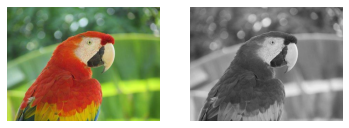

In [24]:
plt.figure()
plt.subplot(121), plt.imshow(parrot), plt.axis('off')
plt.subplot(122), plt.imshow(parrot_gray, cmap='gray'), plt.axis('off')
plt.show()

(750, 1000, 4) float32 <class 'numpy.ndarray'>


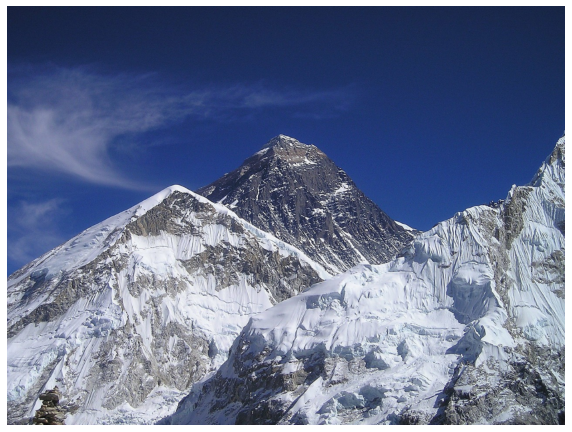

In [25]:
im = mpimg.imread("../images/chap1&2/hill.png") # read the image from disk as a numpy ndarray
print(im.shape, im.dtype, type(im))
# this image contains an α channel, hence num_channels= 4
# (960, 1280, 4) float32 <class 'numpy.ndarray'>
plt.figure(figsize=(10,10))
plt.imshow(im) # display the image
plt.axis('off')
plt.show()

The next code snippet changes the image to a darker image by first setting all of the pixel values below 0.5 to 0 and then saving the numpy ndarray to disk. The saved image is again reloaded and displayed

### More examples

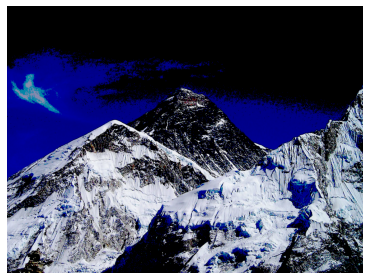

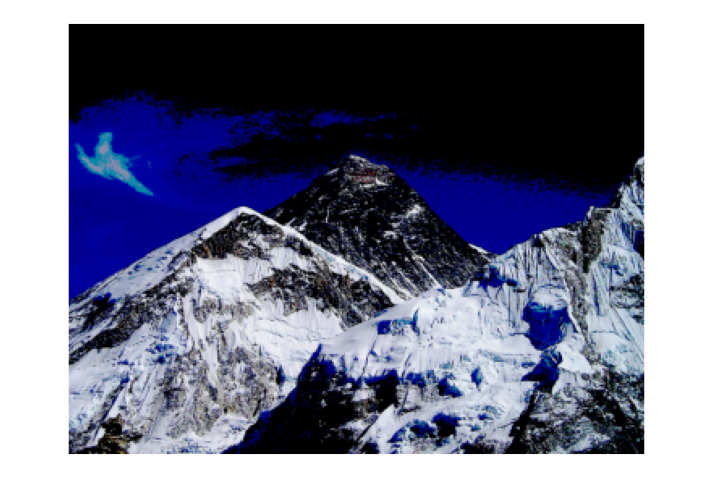

In [26]:
im1 = im
# make the image look darker
im1[im1 < 0.5] = 0
plt.imshow(im1)
plt.axis('off')
plt.tight_layout()
plt.savefig("../images/chap1&2/hill_dark.png")  # save the dark image
im = mpimg.imread("../images/chap1&2/hill_dark.png") # read the dark image
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.axis('off') # no axis ticks
plt.tight_layout()
plt.show()

### Using PIL function open() reading an image in an Image object, and resize() resizing an image

In [27]:
parrot_new = Image.open("lab1_imgs/parrot.jpg")
print(parrot_new.width, parrot_new.height)

453 340


<function matplotlib.pyplot.show(close=None, block=None)>

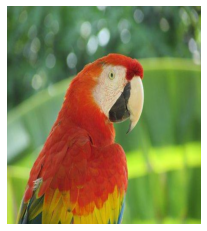

In [28]:
parrot_l = parrot_new.resize((parrot_new.width*2, parrot_new.height*3), Image.BILINEAR) #nilinear interpolation
plt.figure
plt.imshow(parrot_l)
plt.axis('off')
plt.show

In [29]:
print(parrot_l.width, parrot_l.height)

906 1020


### Image types (modes)¶

Image types (modes)
An image can be of the following different types: 
    Single channel images — each pixel is represented by a single value: 
        Binary (monochrome) images (each pixel is represented by a single 0-1 bit)
        Gray-level images (each pixel can be represented with 8-bits and can have values typically in the range of 0-255)
    Multi-channel images—each pixel is represented by a tuple of values: 
        3-channel images; for example, the following: 
            RGB images — each pixel is represented by three-tuple (r, g, b) values, representing red, green, and
blue channel color values for every pixel.
            HSV images — each pixel is represented by three-tuple (h, s, v) values, representing hue (color),
saturation (colorfulness — how much the color is mixed with white), and value (brightness — how much the color is mixed with black) channel color values for every pixel. The HSV model describes colors in a similar manner to how the human eye tends to perceive colors.
        Four-channel images; for example, RGBA images — each pixel is represented by four-tuple (r, g, b, α) values, the last channel representing the transparency.
Note that we can lose some information while converting into grayscale for some colored images. The following code shows such an example with Ishihara plates, used to detect color-blindness. This time, the rgb2gray() function is used from the color module, and both the color and the grayscale images are shown side by side. As can be seen in the following figure, the number 8 is almost invisible in the grayscale version:


Note that we can lose some information while converting into grayscale for some colored images. The following code shows such an example with Ishihara plates, used to detect color-blindness. This time, the rgb2gray() function is used from the color module, and both the color and the grayscale images are shown side by side. As can be seen in the following figure, the number 3 is almost invisible in the grayscale version:

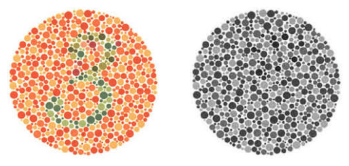

In [30]:
im = imread("lab1_imgs/Ishihara_3.jpeg")
im_g = color.rgb2gray(im)
plt.subplot(121), plt.imshow(im, cmap='gray'), plt.axis('off')
plt.subplot(122), plt.imshow(im_g, cmap='gray'), plt.axis('off')
plt.show()

## Converting from one color space to another

We can convert from one color space into another using library functions; for example, the following code converts an RGB color space into an HSV (or lab) color space image:

<Figure size 432x288 with 0 Axes>

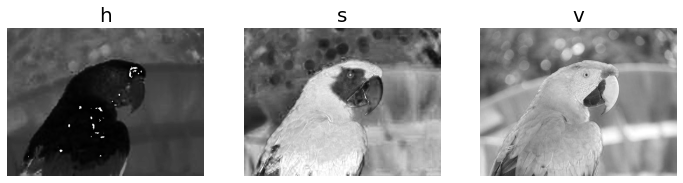

In [31]:
parrot_hsv = color.rgb2hsv(parrot)
plt.gray()
plt.figure(figsize=(12,12))
plt.subplot(131), plt.imshow(parrot_hsv[...,0]), plt.title('h', size=20),
plt.axis('off')
plt.subplot(132), plt.imshow(parrot_hsv[...,1]), plt.title('s', size=20),
plt.axis('off')
plt.subplot(133), plt.imshow(parrot_hsv[...,2]), plt.title('v', size=20),
plt.axis('off')
plt.show()

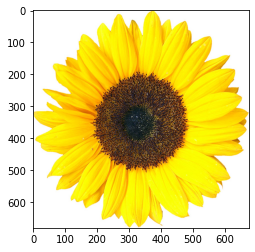

In [32]:
im = io.imread("lab1_imgs/sunflower.tif")
plt.imshow(im)
im_lab=rgb2lab(im)

Setting the color channels in Lab to 0 -- equivalent to turning a color image to grayscale image

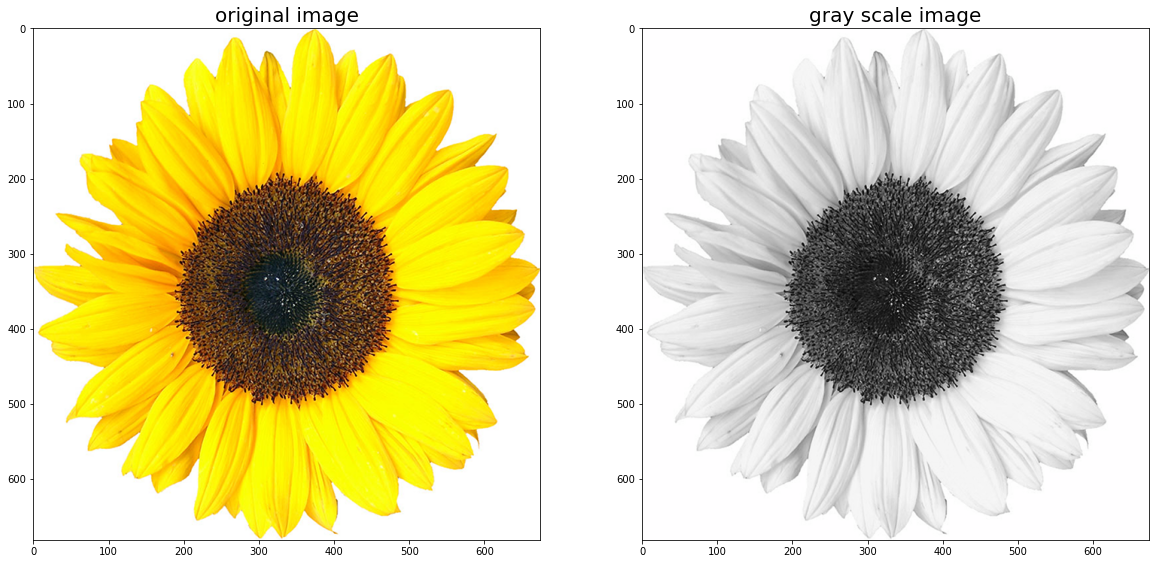

In [33]:
im_lab[...,1]=im_lab[...,2]=0
im_rgb=lab2rgb(im_lab)
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(im),plt.axis('on'),
plt.title('original image',size=20)
plt.subplot(122), plt.imshow(im_rgb), plt.axis('on'), plt.title('gray scale image',size=20)
plt.show()

Changing the intensity (0 channel in Lab space) only

/home/hairong/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 34450 pixels
  return func(*args, **kwargs)


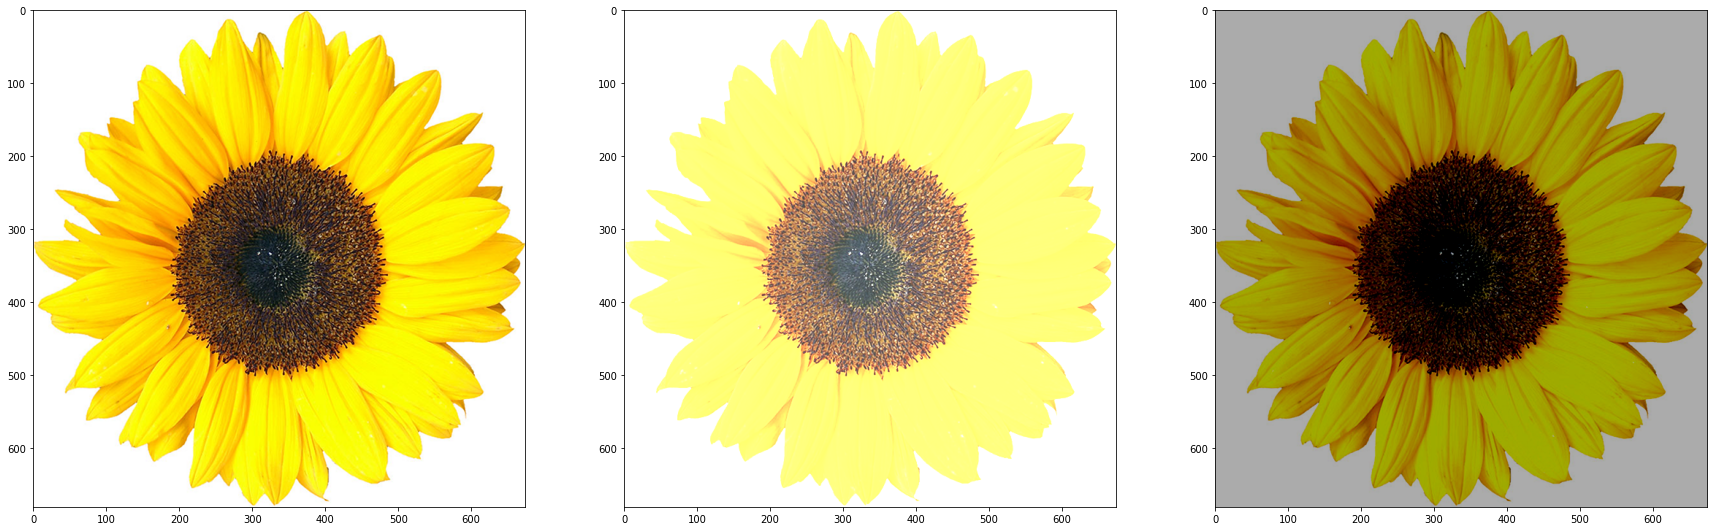

In [34]:
im_lab = rgb2lab(im)
im_lab[...,0]=im_lab[...,0]+30
im_rgb1=lab2rgb(im_lab)
im_lab = rgb2lab(im)
im_lab[...,0]=im_lab[...,0]-30
im_rgb2=lab2rgb(im_lab)
plt.figure(figsize=(30,10))
plt.subplot(131),plt.imshow(im)
plt.subplot(132),plt.imshow(im_rgb1)
plt.subplot(133),plt.imshow(im_rgb2)
plt.show()

Inverting the intensity -- equivalent to image negative

/home/hairong/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 231793 pixels
  return func(*args, **kwargs)


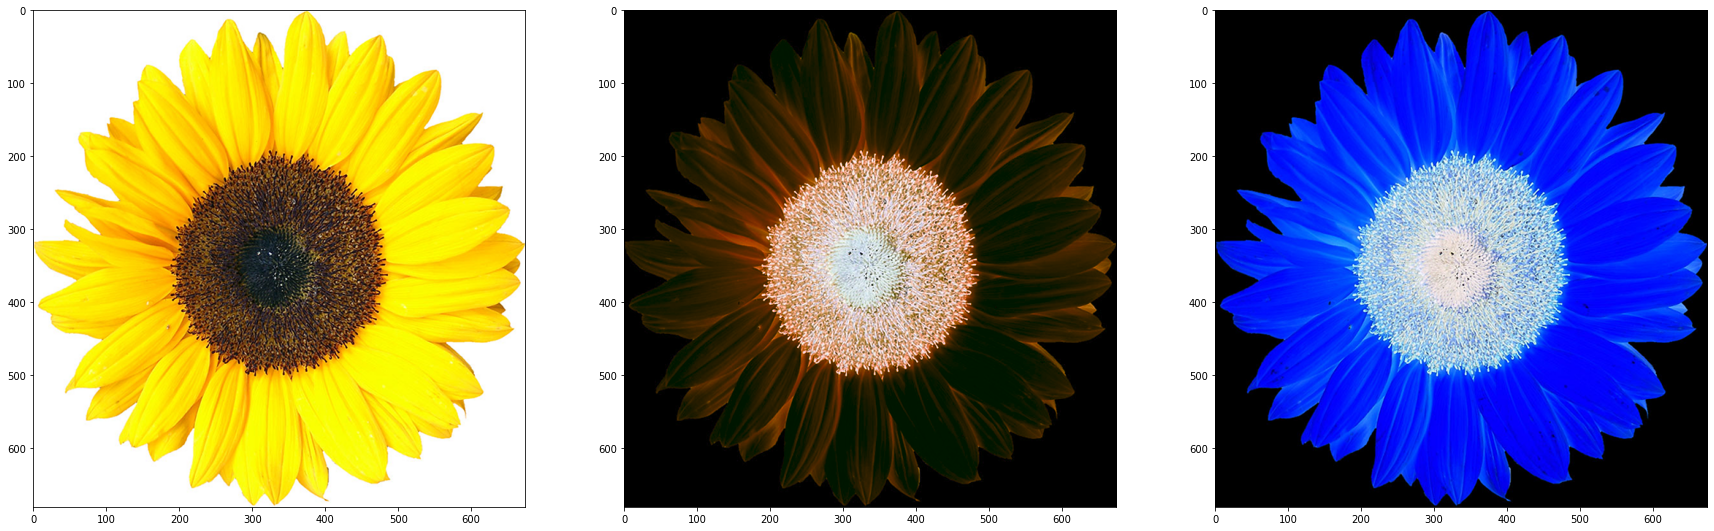

In [35]:
im_lab = rgb2lab(im)
im_lab[...,0]=np.max(im_lab[...,0])-im_lab[...,0]
im_rgb1=lab2rgb(im_lab)
im_rgb2=np.max(im)-im
plt.figure(figsize=(30,10))
plt.subplot(131),plt.imshow(im)
plt.subplot(132),plt.imshow(im_rgb1)
plt.subplot(133),plt.imshow(im_rgb2)
plt.show()

## Image geometric transformation: identity, reflection, scaling, rotation, and shearing using Scipy affine_transform function

In [36]:
lx,ly=lena_gray.shape #using the grayscale lena image

In [37]:
lena_gray.shape

(512, 512)

Apply identity transform. The transform matrix m_I need to be set accordingly 

In [38]:
m_I = np.array([[1,0,0],[0,1,0],[0,0,1]])
lena_gray_I = affine_transform(lena_gray,m_I)

Apply flipping or reflection transform along the x-axis

In [39]:
m_F = np.array([[1,0,0],[0,-1,0],[0,0,1]]) @ np.array([[1,0,0],[0,1,-ly],[0,0,1]])
lena_gray_F=affine_transform(lena_gray,m_F)

Scale the image 0.75 times along the x-axis and 1.25 times along thr y axis

In [40]:
t_x,t_y = 0.75,1.25
m_S = np.array([[t_x,0,0],[0,t_y,0],[0,0,1]])
lena_gray_S=affine_transform(lena_gray,m_S)

Rotate the image by 30 degrees counter-clockwise. It's a composite operation: first, you will need to shift/center the image, apply rotation, and then apply inverse shift:

In [41]:
theta = np.pi/6
m_R = np.array([[1,0,lx/2],[0,1,ly/2],[0,0,1]]) @ np.array([[np.cos(theta),np.sin(theta),0],[np.sin(theta),-
                                           np.cos(theta),0],[0,0,1]]) @ np.array([[1,0,-lx/2],[0,1,-ly/2],[0,0,1]])
lena_gray_R=affine_transform(lena_gray,m_R)

Apply shear transformation 

In [42]:
lambda1 = 0.5
m_Sh = np.array([[1,lambda1,0],[lambda1,1,0],[0,0,1]])
lena_gray_Sh = affine_transform(lena_gray, m_Sh)

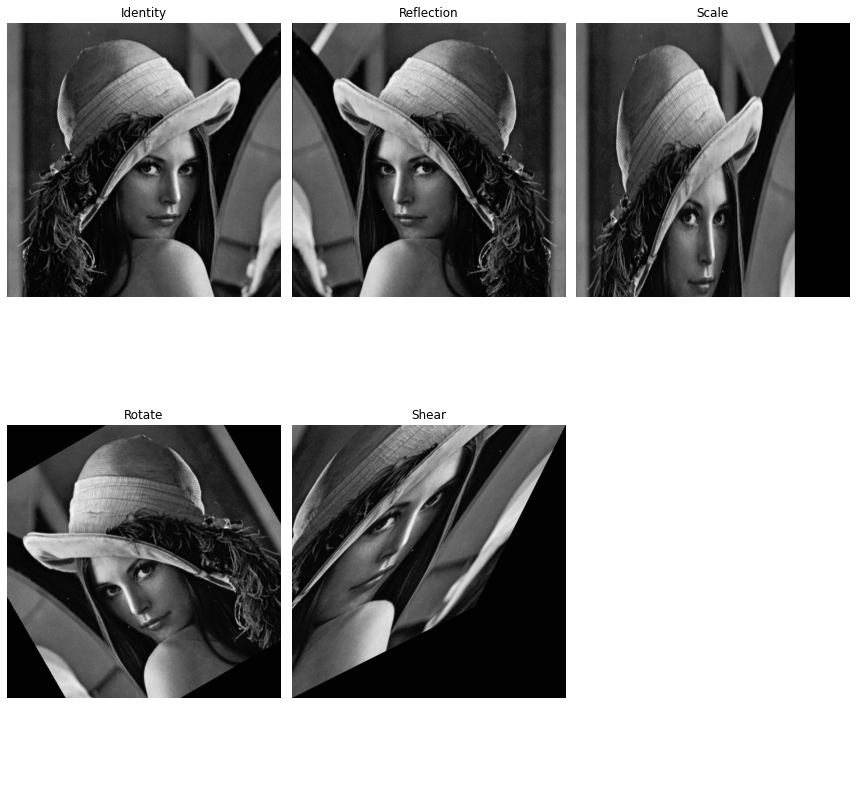

In [43]:
fig,axes = plt.subplots(nrows=2, ncols=3, figsize=(12,12), sharex=True, sharey=True)
ax=axes.ravel()
ax[0].imshow(lena_gray_I, cmap=plt.cm.gray)
ax[0].set_title('Identity')

ax[1].imshow(lena_gray_F, cmap=plt.cm.gray)
ax[1].set_title('Reflection')

ax[2].imshow(lena_gray_S, cmap='gray')
ax[2].set_title('Scale')

ax[3].imshow(lena_gray_R, cmap=plt.cm.gray)
ax[3].set_title('Rotate')

ax[4].imshow(lena_gray_Sh, cmap=plt.cm.gray)
ax[4].set_title('Shear')

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

In [51]:
m_F = np.array([[1,0,0],[0,-1,0],[0,0,1]]) @ np.array([[1,0,0],[0,1,-ly],[0,0,1]]) #this is matrix multiplication
print(m_F)

[[  1   0   0]
 [  0  -1 512]
 [  0   0   1]]
